# Analysis to find the best markets.
- This analysis is focused on finding which countries are the best countries to invest on marketing
- What are the targeted groups should the advertisement be focused on


### Analysis Outline
1. Import all the libraries we need to do the analysis
2. Load the data set
3. Review the dataset and look for interesting parts
4. filter the dataset to remain with the few needed columns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time


In [2]:
new_coders = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

C:\Users\fidele\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:

new_coders

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,never see,NaN,NaN
18171,31.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18172,39.0,0.0,NaN,NaN,NaN,NaN,3.0,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
18173,54.0,0.0,NaN,NaN,NaN,NaN,3.0,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN


In [4]:
cleaned_data = new_coders[new_coders['MonthsProgramming'] != 0]
cleaned_data = cleaned_data[cleaned_data['CountryLive'].notna()]
cleaned_data = cleaned_data[cleaned_data['CountryLive'].notna()]
cleaned_data = cleaned_data[cleaned_data['MoneyForLearning'] != 0]
cleaned_data = cleaned_data[cleaned_data['MoneyForLearning'].notna()]


In [5]:
#lets try to avoid the data that is coming from the countries with few respondent


#define the function that will take the value country
    #create an empty list
    #take the number of rows with the value as of country 
    #append the value into the empty list
    #return the list
    
    

    
def calc_no_resp(country):
    output = []
    no_of_resp =cleaned_data['CountryLive'][cleaned_data['CountryLive']== country].count()
    output.append(no_of_resp)
    return output[0]
    

In [6]:
start = time.time()
cleaned_data['Number of Respondent'] = cleaned_data['CountryLive'].apply(calc_no_resp)
end =time.time()
end-start

16.957629442214966

In [7]:
cleaned_data = cleaned_data[cleaned_data['Number of Respondent'] >50]
cleaned_data = cleaned_data[cleaned_data['MoneyForLearning'] <1000]

In [8]:
cleaned_data['CountryLive'].unique()

array(['Canada', 'United States of America', 'Mexico', 'Romania', 'Italy',
       'Brazil', 'Australia', 'India', 'Netherlands (Holland, Europe)',
       'Germany', 'United Kingdom', 'France', 'Poland', 'Kenya', 'Spain',
       'Russia', 'Turkey', 'Ukraine', 'Nigeria', 'Greece', 'South Africa'],
      dtype=object)

In [9]:
cleaned_data['MoneyForLearning_monthly'] = cleaned_data['MoneyForLearning']/cleaned_data['MonthsProgramming']

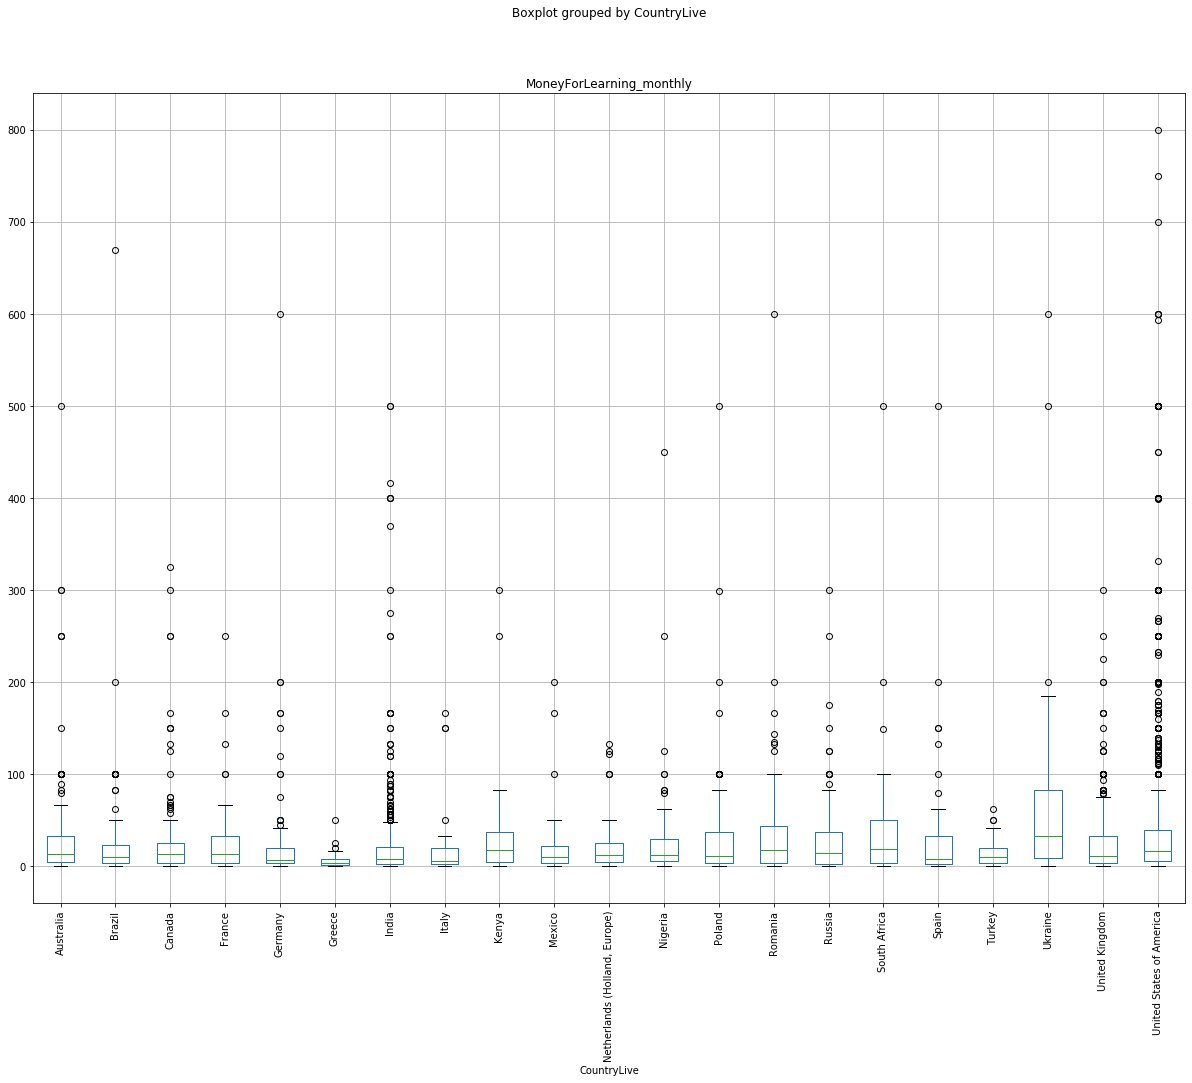

In [10]:

cleaned_data.boxplot(by='CountryLive',column=['MoneyForLearning_monthly'],rot =90,figsize=(20,15))

In [15]:
cleaned_data.groupby('CountryLive', as_index=False).agg({'MoneyForLearning_monthly': "median"}).sort_values(by= "MoneyForLearning_monthly", ascending = False)

,CountryLive,MoneyForLearning_monthly
18,Ukraine,33.333333
15,South Africa,18.518519
13,Romania,18.333333
8,Kenya,18.333333
20,United States of America,16.666667
14,Russia,14.642857
0,Australia,13.888889
2,Canada,13.888889
3,France,13.333333
11,Nigeria,12.500000


In [ ]:
new_coders['MonthsProgramming'][new_coders['CountryLive'] == 'Yemen']

In [ ]:
plt.barh(cleaned_data['CountryLive'],cleaned_data['MoneyForLearning_monthly'])
plt.show()